In [27]:
import pandas as pd
import matplotlib as plt
from matplotlib import pyplot
import seaborn as sns
import numpy as np
import plotly.express as px
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample

In [16]:
df = pd.read_csv('IMPUESTO_PREDIAL.csv', delimiter=';')

In [26]:
df.head(2)

,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,UUID,CATEGORIA,ANIOS_PAGADOS,NUMERO_PREDIOS,LUGAR,IMPUESTO,GASTO_ADMINISTRATIVO,INTERES_MORATORIO,SALDO,FECHA_PAGO,RECIBO,PAGO,FECHA_CORTE
0,CUSCO,CHUMBIVILCAS,VELILLE,80708,13437452-38b5-416c-a419-b1e971499b1e,IMPUESTO PREDIAL,2023,1,COM. COLLANA SECTOR K'UCHUHUASI,29.7,4,0.0,0,20230118,20230000040,33.7,20230720
1,CUSCO,CHUMBIVILCAS,VELILLE,80708,b61e4d1f-dbb1-4435-ac8d-fedc66bcadc6,IMPUESTO PREDIAL,2023,1,AV. VILCANOTA S/N,29.7,4,0.0,0,20230124,20230000047,33.7,20230720


In [11]:
df.shape

(96, 17)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DEPARTAMENTO          96 non-null     object 
 1   PROVINCIA             96 non-null     object 
 2   DISTRITO              96 non-null     object 
 3   UBIGEO                96 non-null     int64  
 4   UUID                  96 non-null     object 
 5   CATEGORIA             96 non-null     object 
 6   ANIOS_PAGADOS         96 non-null     object 
 7   NUMERO_PREDIOS        96 non-null     int64  
 8   LUGAR                 96 non-null     object 
 9   IMPUESTO              96 non-null     object 
 10  GASTO_ADMINISTRATIVO  96 non-null     int64  
 11  INTERES_MORATORIO     96 non-null     float64
 12  SALDO                 96 non-null     int64  
 13  FECHA_PAGO            96 non-null     int64  
 14  RECIBO                96 non-null     int64  
 15  PAGO                  96 

In [13]:
df.dtypes

DEPARTAMENTO             object
PROVINCIA                object
DISTRITO                 object
UBIGEO                    int64
UUID                     object
CATEGORIA                object
ANIOS_PAGADOS            object
NUMERO_PREDIOS            int64
LUGAR                    object
IMPUESTO                 object
GASTO_ADMINISTRATIVO      int64
INTERES_MORATORIO       float64
SALDO                     int64
FECHA_PAGO                int64
RECIBO                    int64
PAGO                    float64
FECHA_CORTE               int64
dtype: object

In [14]:
print(df.isnull().sum())

DEPARTAMENTO            0
PROVINCIA               0
DISTRITO                0
UBIGEO                  0
UUID                    0
CATEGORIA               0
ANIOS_PAGADOS           0
NUMERO_PREDIOS          0
LUGAR                   0
IMPUESTO                0
GASTO_ADMINISTRATIVO    0
INTERES_MORATORIO       0
SALDO                   0
FECHA_PAGO              0
RECIBO                  0
PAGO                    0
FECHA_CORTE             0
dtype: int64


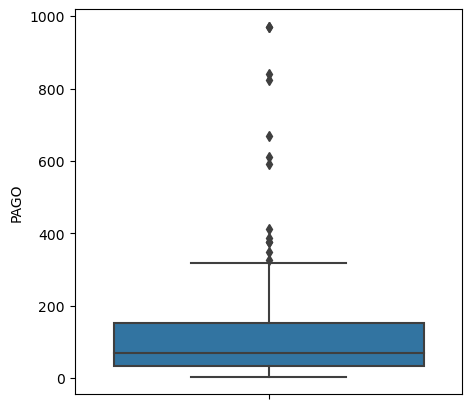

In [20]:
fig = pyplot.figure(figsize=(5,5))
sns.boxplot(y=df["PAGO"])
pyplot.show()

In [23]:
df.describe(include=['float64'])

,INTERES_MORATORIO,PAGO
count,96.000000,96.000000
mean,29.947917,150.239583
std,98.892769,206.610929
min,0.000000,4.000000
25%,0.000000,33.700000
50%,0.000000,69.400000
75%,6.600000,151.000000
max,574.100000,970.900000


In [24]:
df.describe(include=['object'])

,DEPARTAMENTO,PROVINCIA,DISTRITO,UUID,CATEGORIA,ANIOS_PAGADOS,LUGAR,IMPUESTO
count,96,96,96,96,96,96,96,96
unique,1,1,1,95,1,14,84,50
top,CUSCO,CHUMBIVILCAS,VELILLE,2d79935f-9207-4102-b760-1aa05de1a790,IMPUESTO PREDIAL,2023,CERCADO VELILLE AV. MARIA PARADO DE BELLIDO,29.7
freq,96,96,96,2,96,45,8,23


<function matplotlib.pyplot.show(close=None, block=None)>

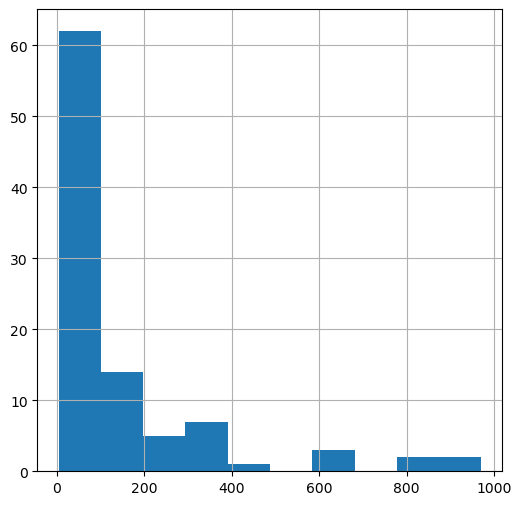

In [25]:
df['PAGO'].hist(figsize = (6,6))
pyplot.show

In [26]:
mean = df['PAGO'].mean()
median = df['PAGO'].median()
mode = df['PAGO'].mode()
skew = df['PAGO'].skew()
kurt = df['PAGO'].kurt()
print("La media es:", mean)
print("La mediana es:", median)
print("La moda es:", mode)
print("El sesgo es:", skew)
print("La kurtosis es:", kurt)

La media es: 150.23958333333334
La mediana es: 69.4
La moda es: 0    33.7
Name: PAGO, dtype: float64
El sesgo es: 2.5181000171166588
La kurtosis es: 6.25035125490156


<function matplotlib.pyplot.show(close=None, block=None)>

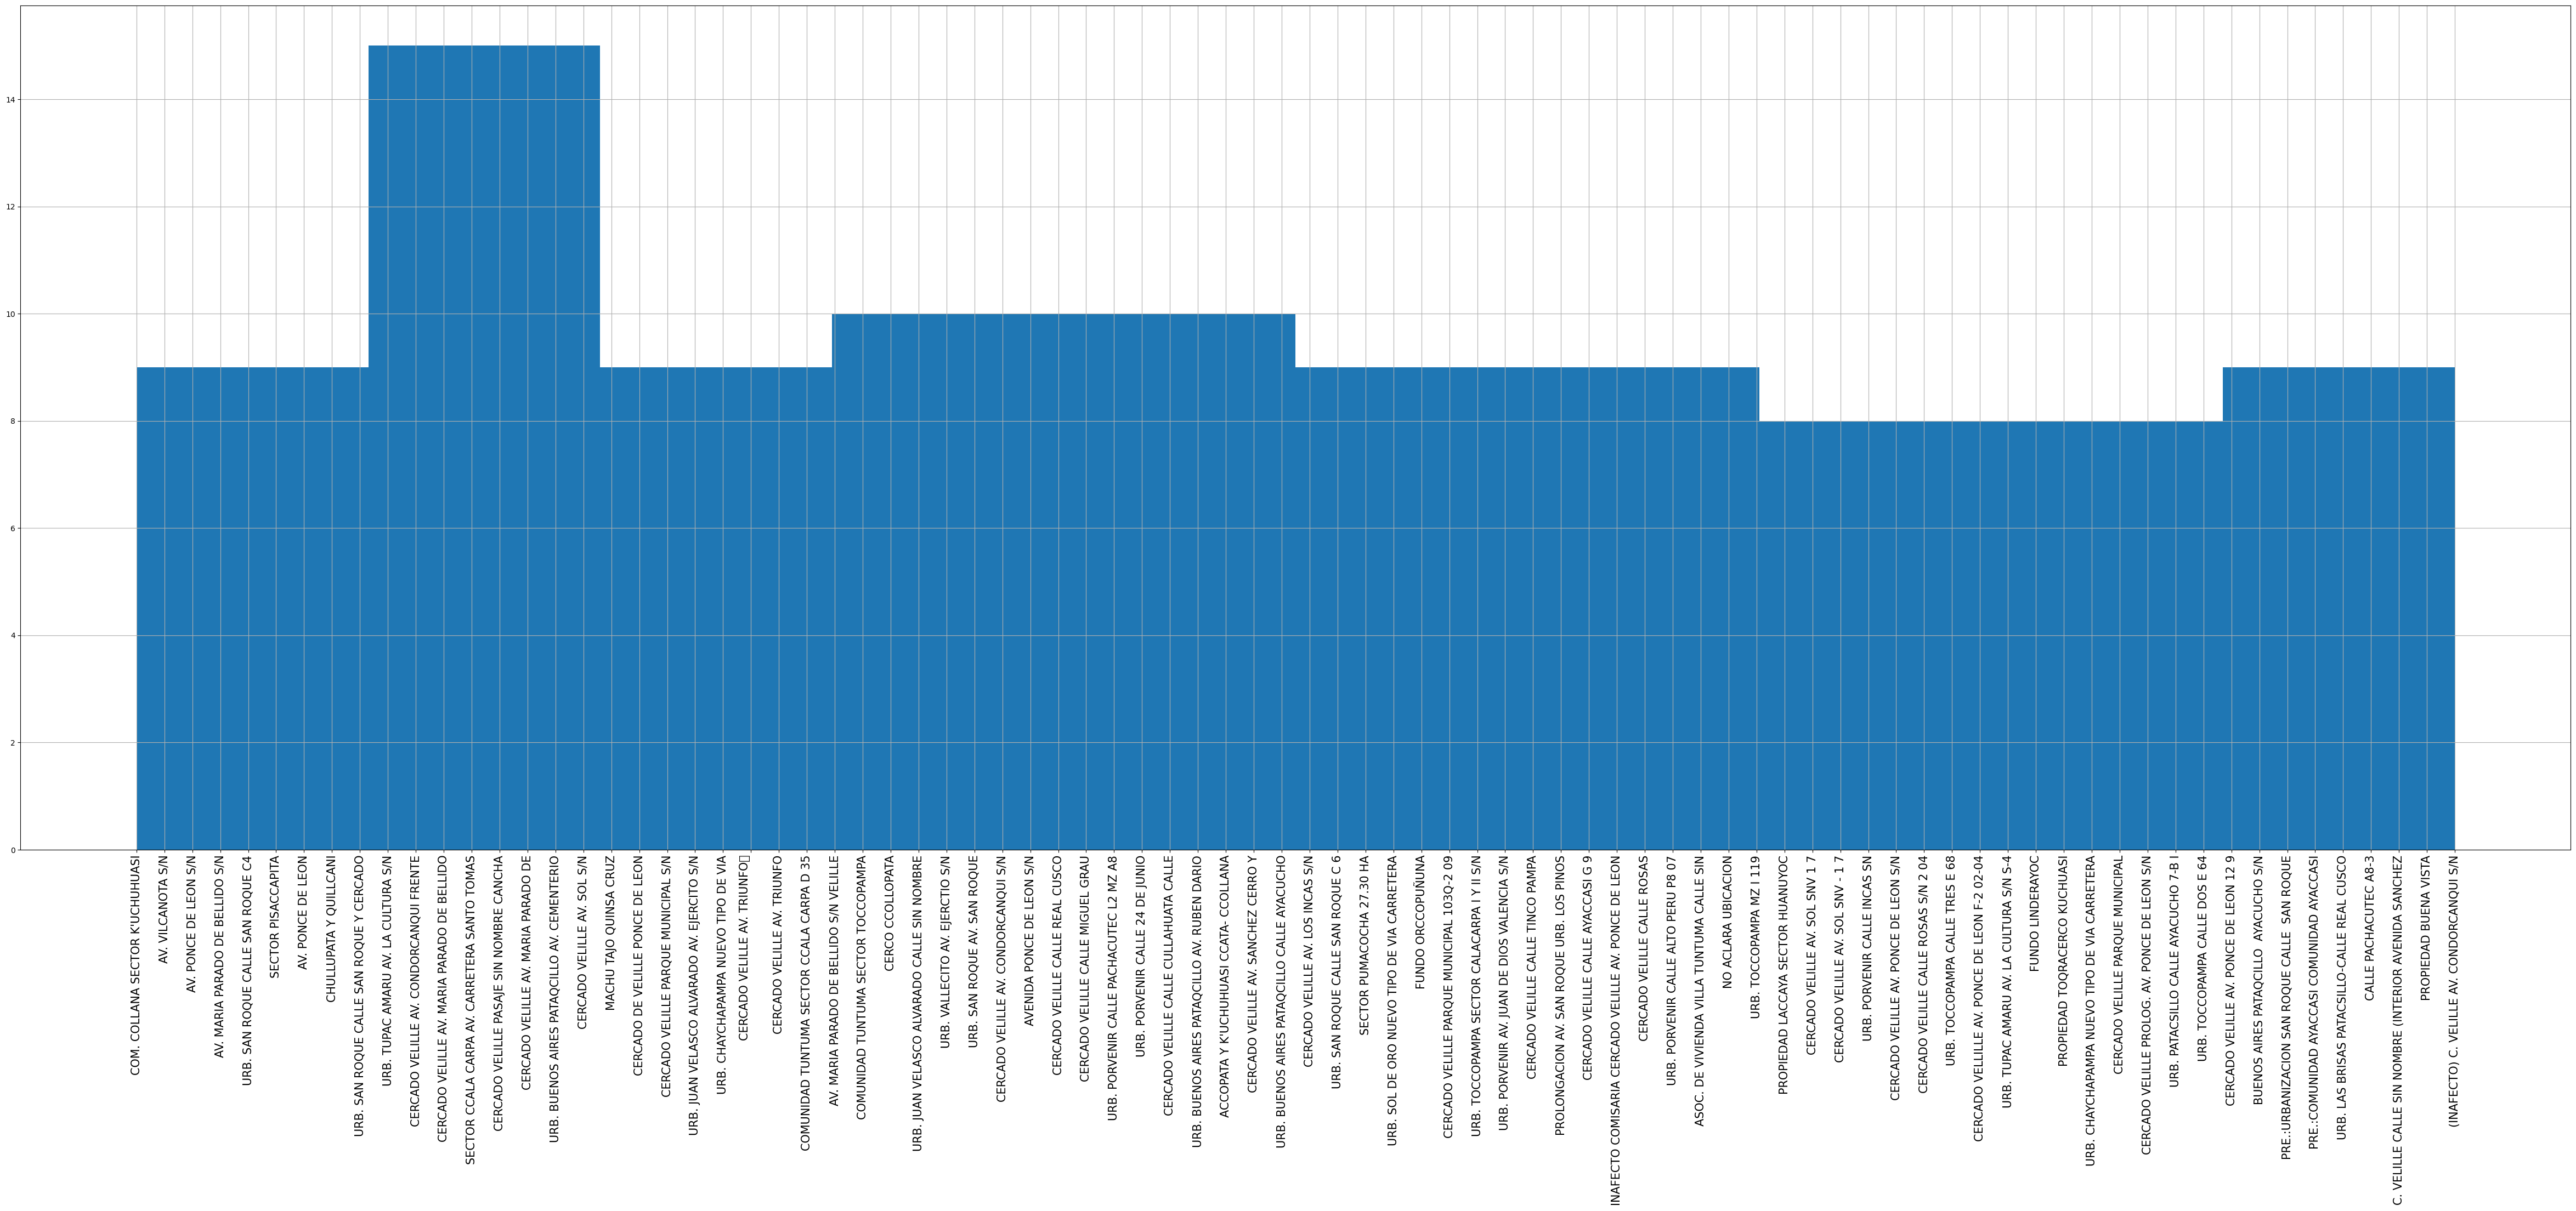

In [30]:
df['LUGAR'].hist(figsize = (60,20))
pyplot.xticks(rotation=90,fontsize=15);
pyplot.show

<function matplotlib.pyplot.show(close=None, block=None)>

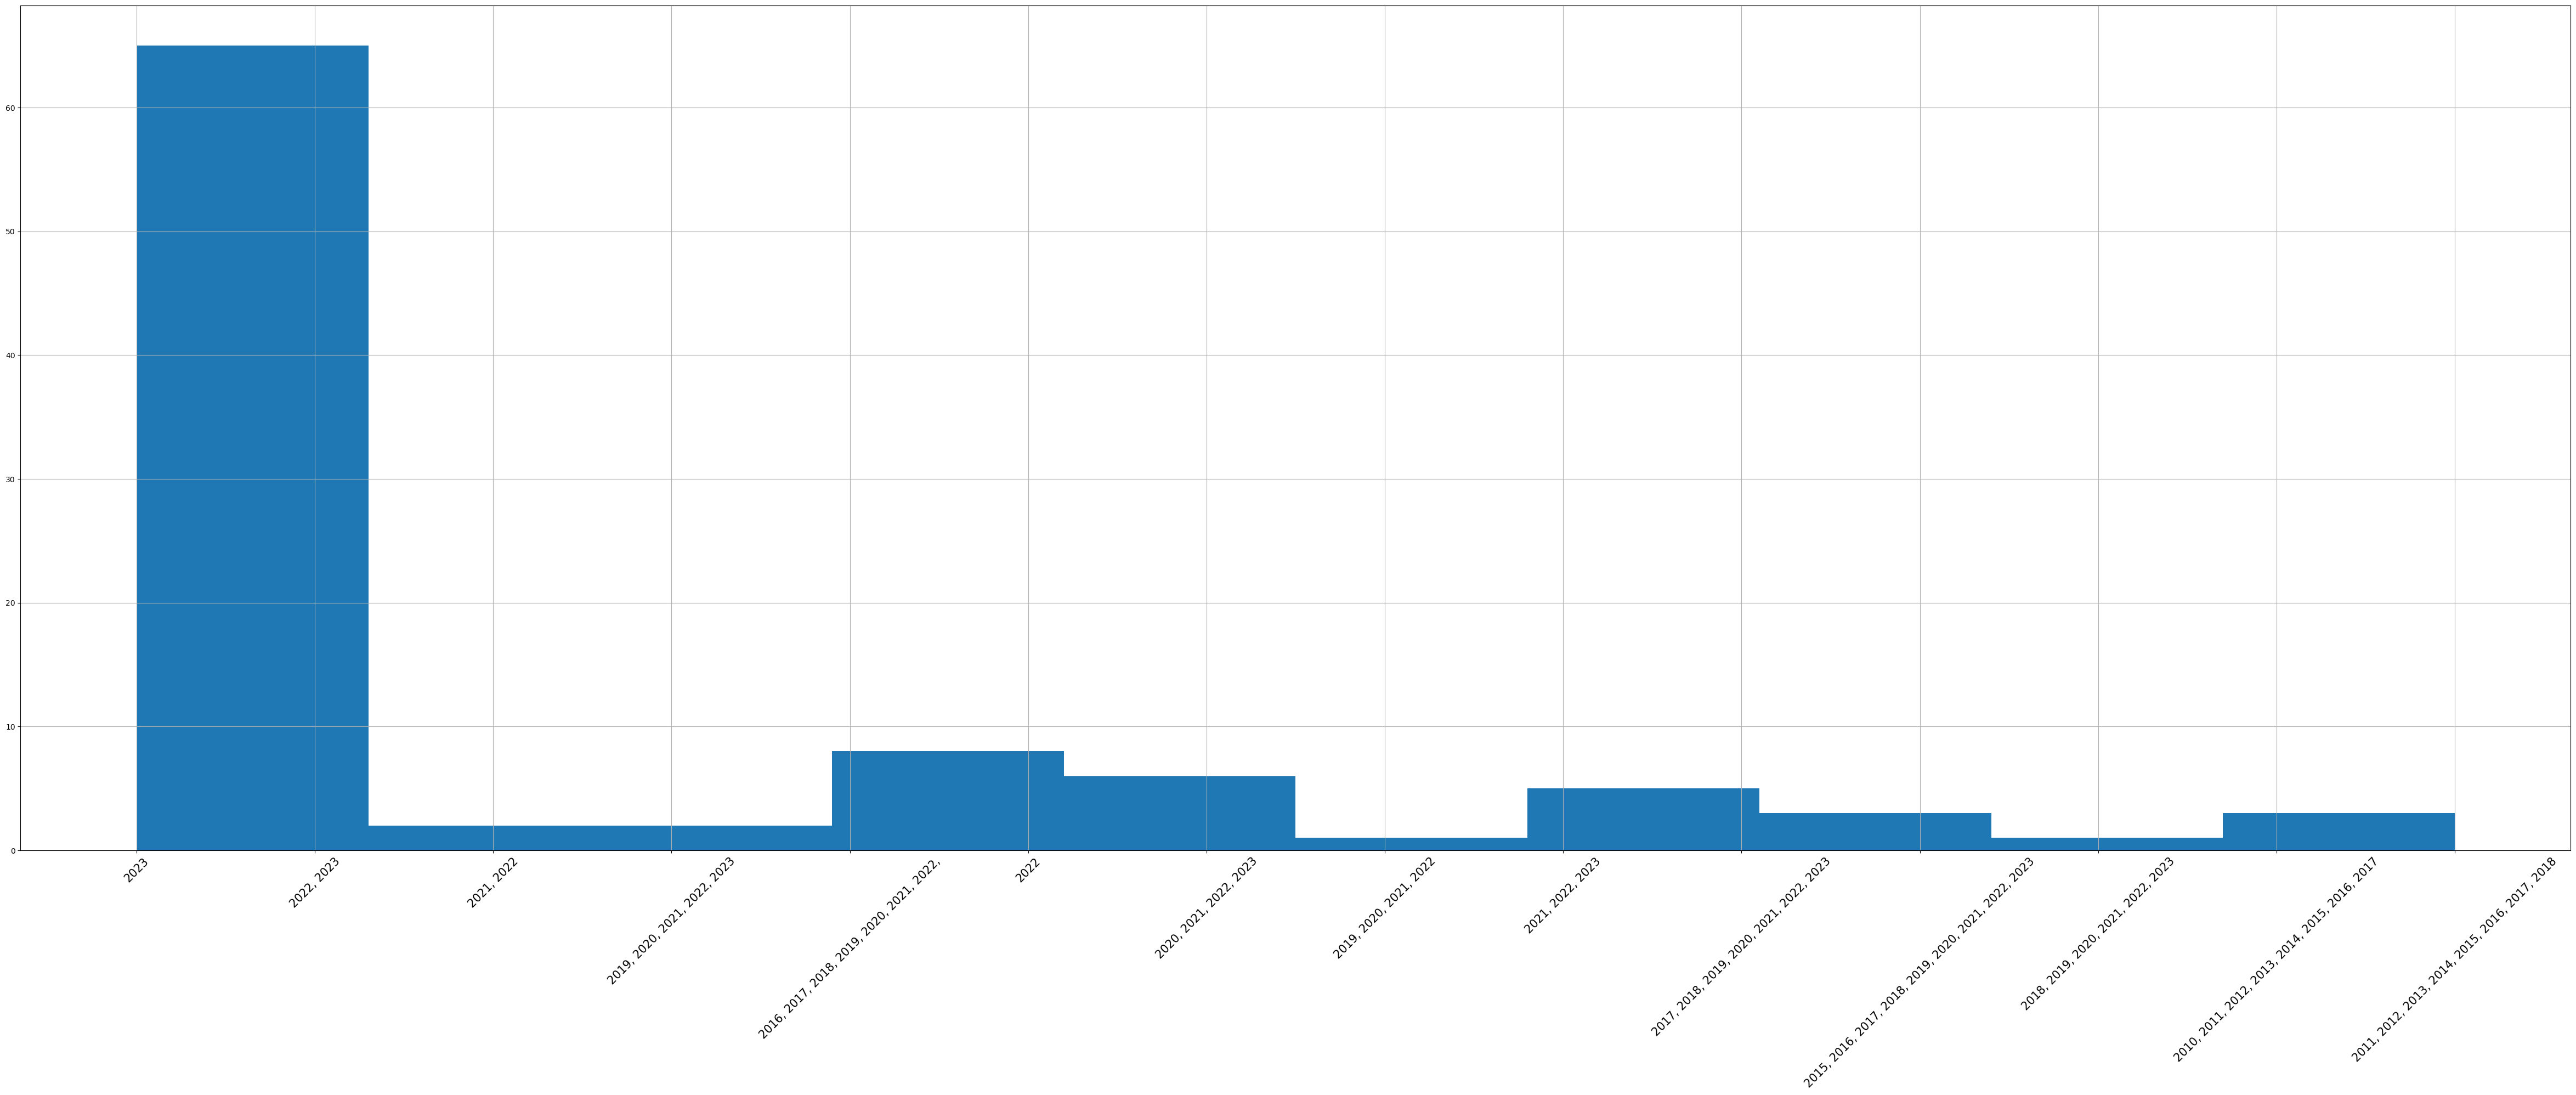

In [4]:
df['ANIOS_PAGADOS'].hist(figsize = (60,20))
pyplot.xticks(rotation=45,fontsize=15);
pyplot.show

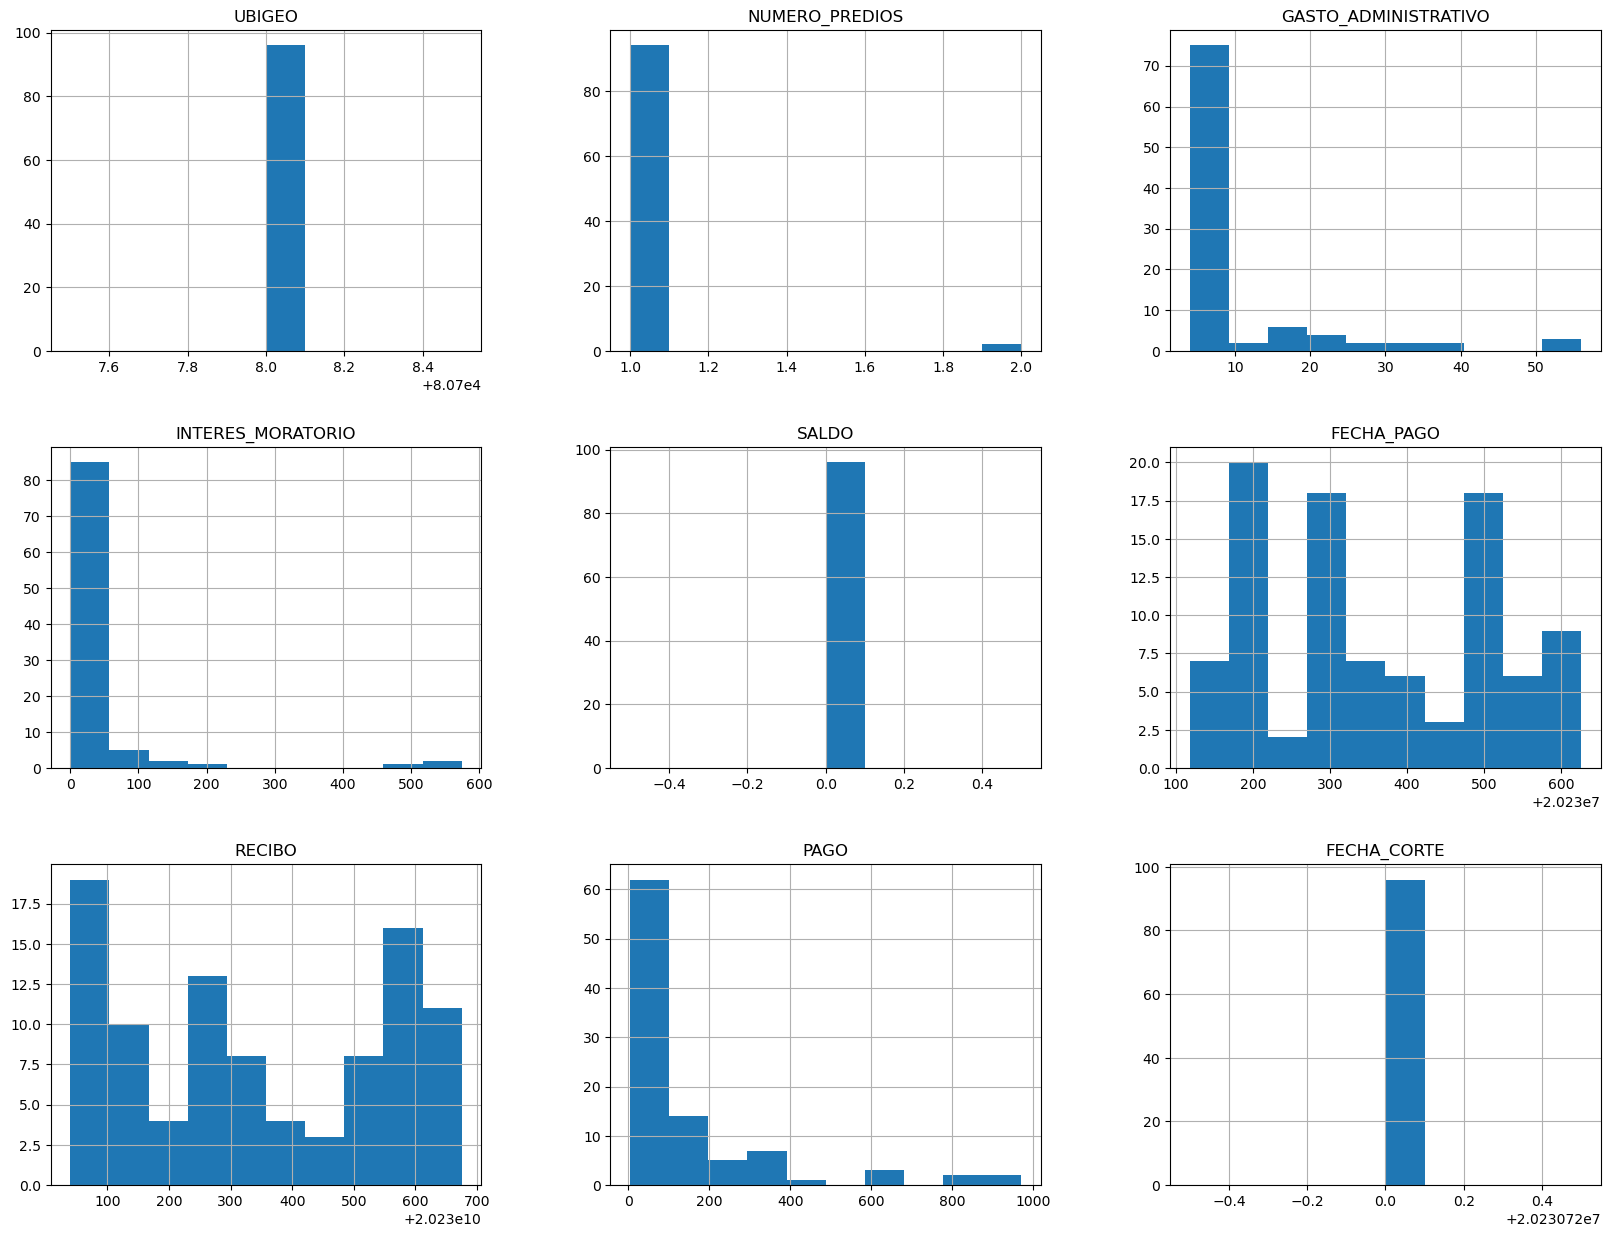

In [7]:
df.hist(figsize=(20,15));

<function matplotlib.pyplot.show(close=None, block=None)>

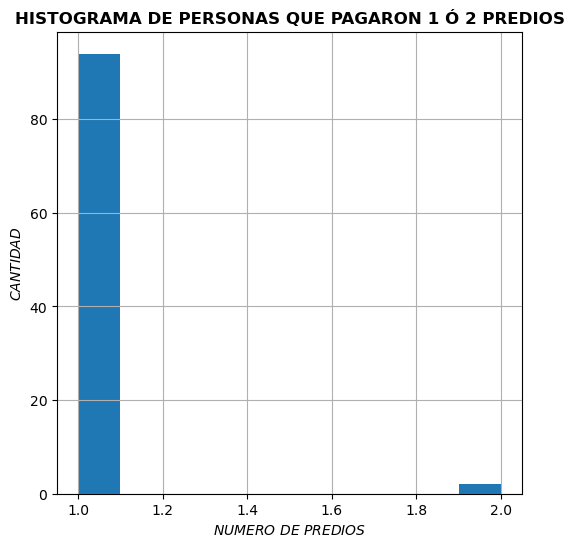

In [12]:
df['NUMERO_PREDIOS'].hist(figsize = (6,6))
pyplot.xlabel('$NUMERO\ DE\ PREDIOS$')
pyplot.ylabel('$CANTIDAD$')
pyplot.title('HISTOGRAMA DE PERSONAS QUE PAGARON 1 Ó 2 PREDIOS', fontweight ="bold")
pyplot.show

<function matplotlib.pyplot.show(close=None, block=None)>

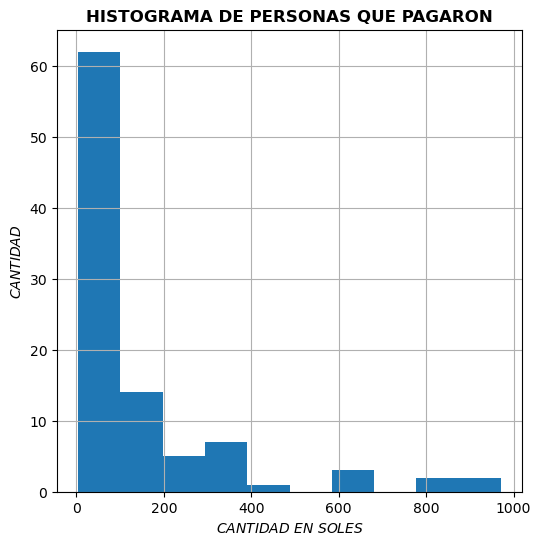

In [13]:
df['PAGO'].hist(figsize = (6,6))
pyplot.xlabel('$CANTIDAD\ EN\ SOLES$')
pyplot.ylabel('$CANTIDAD$')
pyplot.title('HISTOGRAMA DE PERSONAS QUE PAGARON', fontweight ="bold")
pyplot.show

<function matplotlib.pyplot.show(close=None, block=None)>

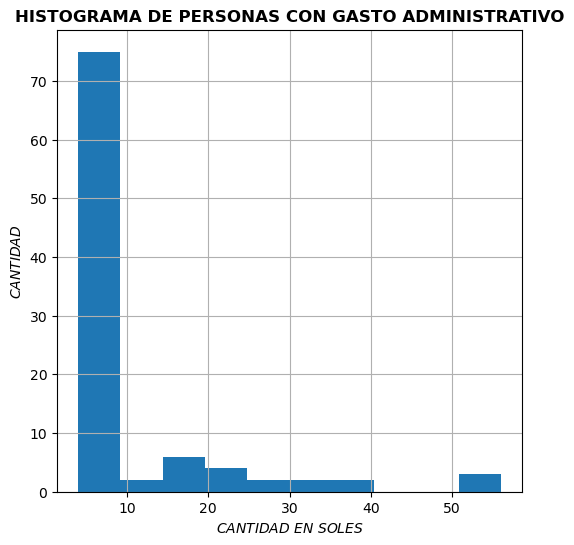

In [15]:
df['GASTO_ADMINISTRATIVO'].hist(figsize = (6,6))
pyplot.xlabel('$CANTIDAD\ EN\ SOLES$')
pyplot.ylabel('$CANTIDAD$')
pyplot.title('HISTOGRAMA DE PERSONAS CON GASTO ADMINISTRATIVO', fontweight ="bold")
pyplot.show

<function matplotlib.pyplot.show(close=None, block=None)>

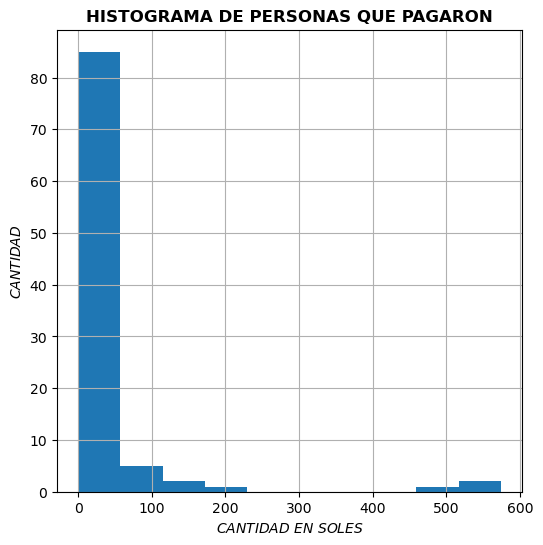

In [16]:
df['INTERES_MORATORIO'].hist(figsize = (6,6))
pyplot.xlabel('$CANTIDAD\ EN\ SOLES$')
pyplot.ylabel('$CANTIDAD$')
pyplot.title('HISTOGRAMA DE PERSONAS QUE PAGARON', fontweight ="bold")
pyplot.show

Text(0, 0.5, '$PAGO$')

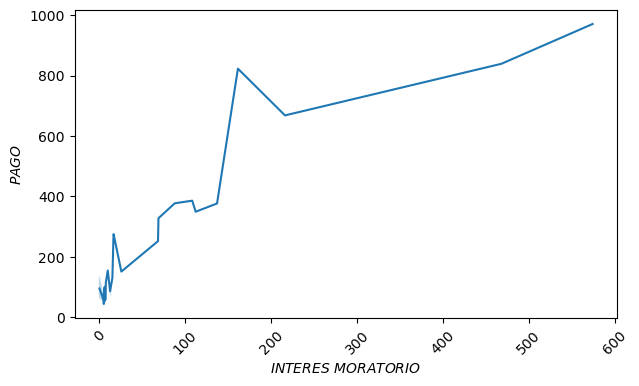

In [20]:
fig = pyplot.figure(figsize=(7,4),dpi=100)
pyplot.xticks(rotation=45,fontsize=10);
sns.lineplot(data=df, x= 'INTERES_MORATORIO', y = 'PAGO')
pyplot.xlabel('$INTERES\ MORATORIO$')
pyplot.ylabel('$PAGO$')

In [3]:
df_cat = df.select_dtypes(include=['object'])
df_cat.head()

,DEPARTAMENTO,PROVINCIA,DISTRITO,UUID,CATEGORIA,ANIOS_PAGADOS,LUGAR,IMPUESTO
0,CUSCO,CHUMBIVILCAS,VELILLE,13437452-38b5-416c-a419-b1e971499b1e,IMPUESTO PREDIAL,2023,COM. COLLANA SECTOR K'UCHUHUASI,29.7
1,CUSCO,CHUMBIVILCAS,VELILLE,b61e4d1f-dbb1-4435-ac8d-fedc66bcadc6,IMPUESTO PREDIAL,2023,AV. VILCANOTA S/N,29.7
2,CUSCO,CHUMBIVILCAS,VELILLE,1566d8ef-0d96-43e0-a03c-abbc3f6b0861,IMPUESTO PREDIAL,"2022, 2023",AV. PONCE DE LEON S/N,57.3
3,CUSCO,CHUMBIVILCAS,VELILLE,b86986dc-668b-4cf0-8d9f-b098324356a5,IMPUESTO PREDIAL,2023,AV. MARIA PARADO DE BELLIDO S/N,99.8
4,CUSCO,CHUMBIVILCAS,VELILLE,be1e8a1b-d09e-49af-9e5b-fb288870047f,IMPUESTO PREDIAL,"2021, 2022",URB. SAN ROQUE CALLE SAN ROQUE C4,54


In [ ]:
for col in df_cat.columns:
    print(f"{col}: \n{df_cat[col].unique()}\n")

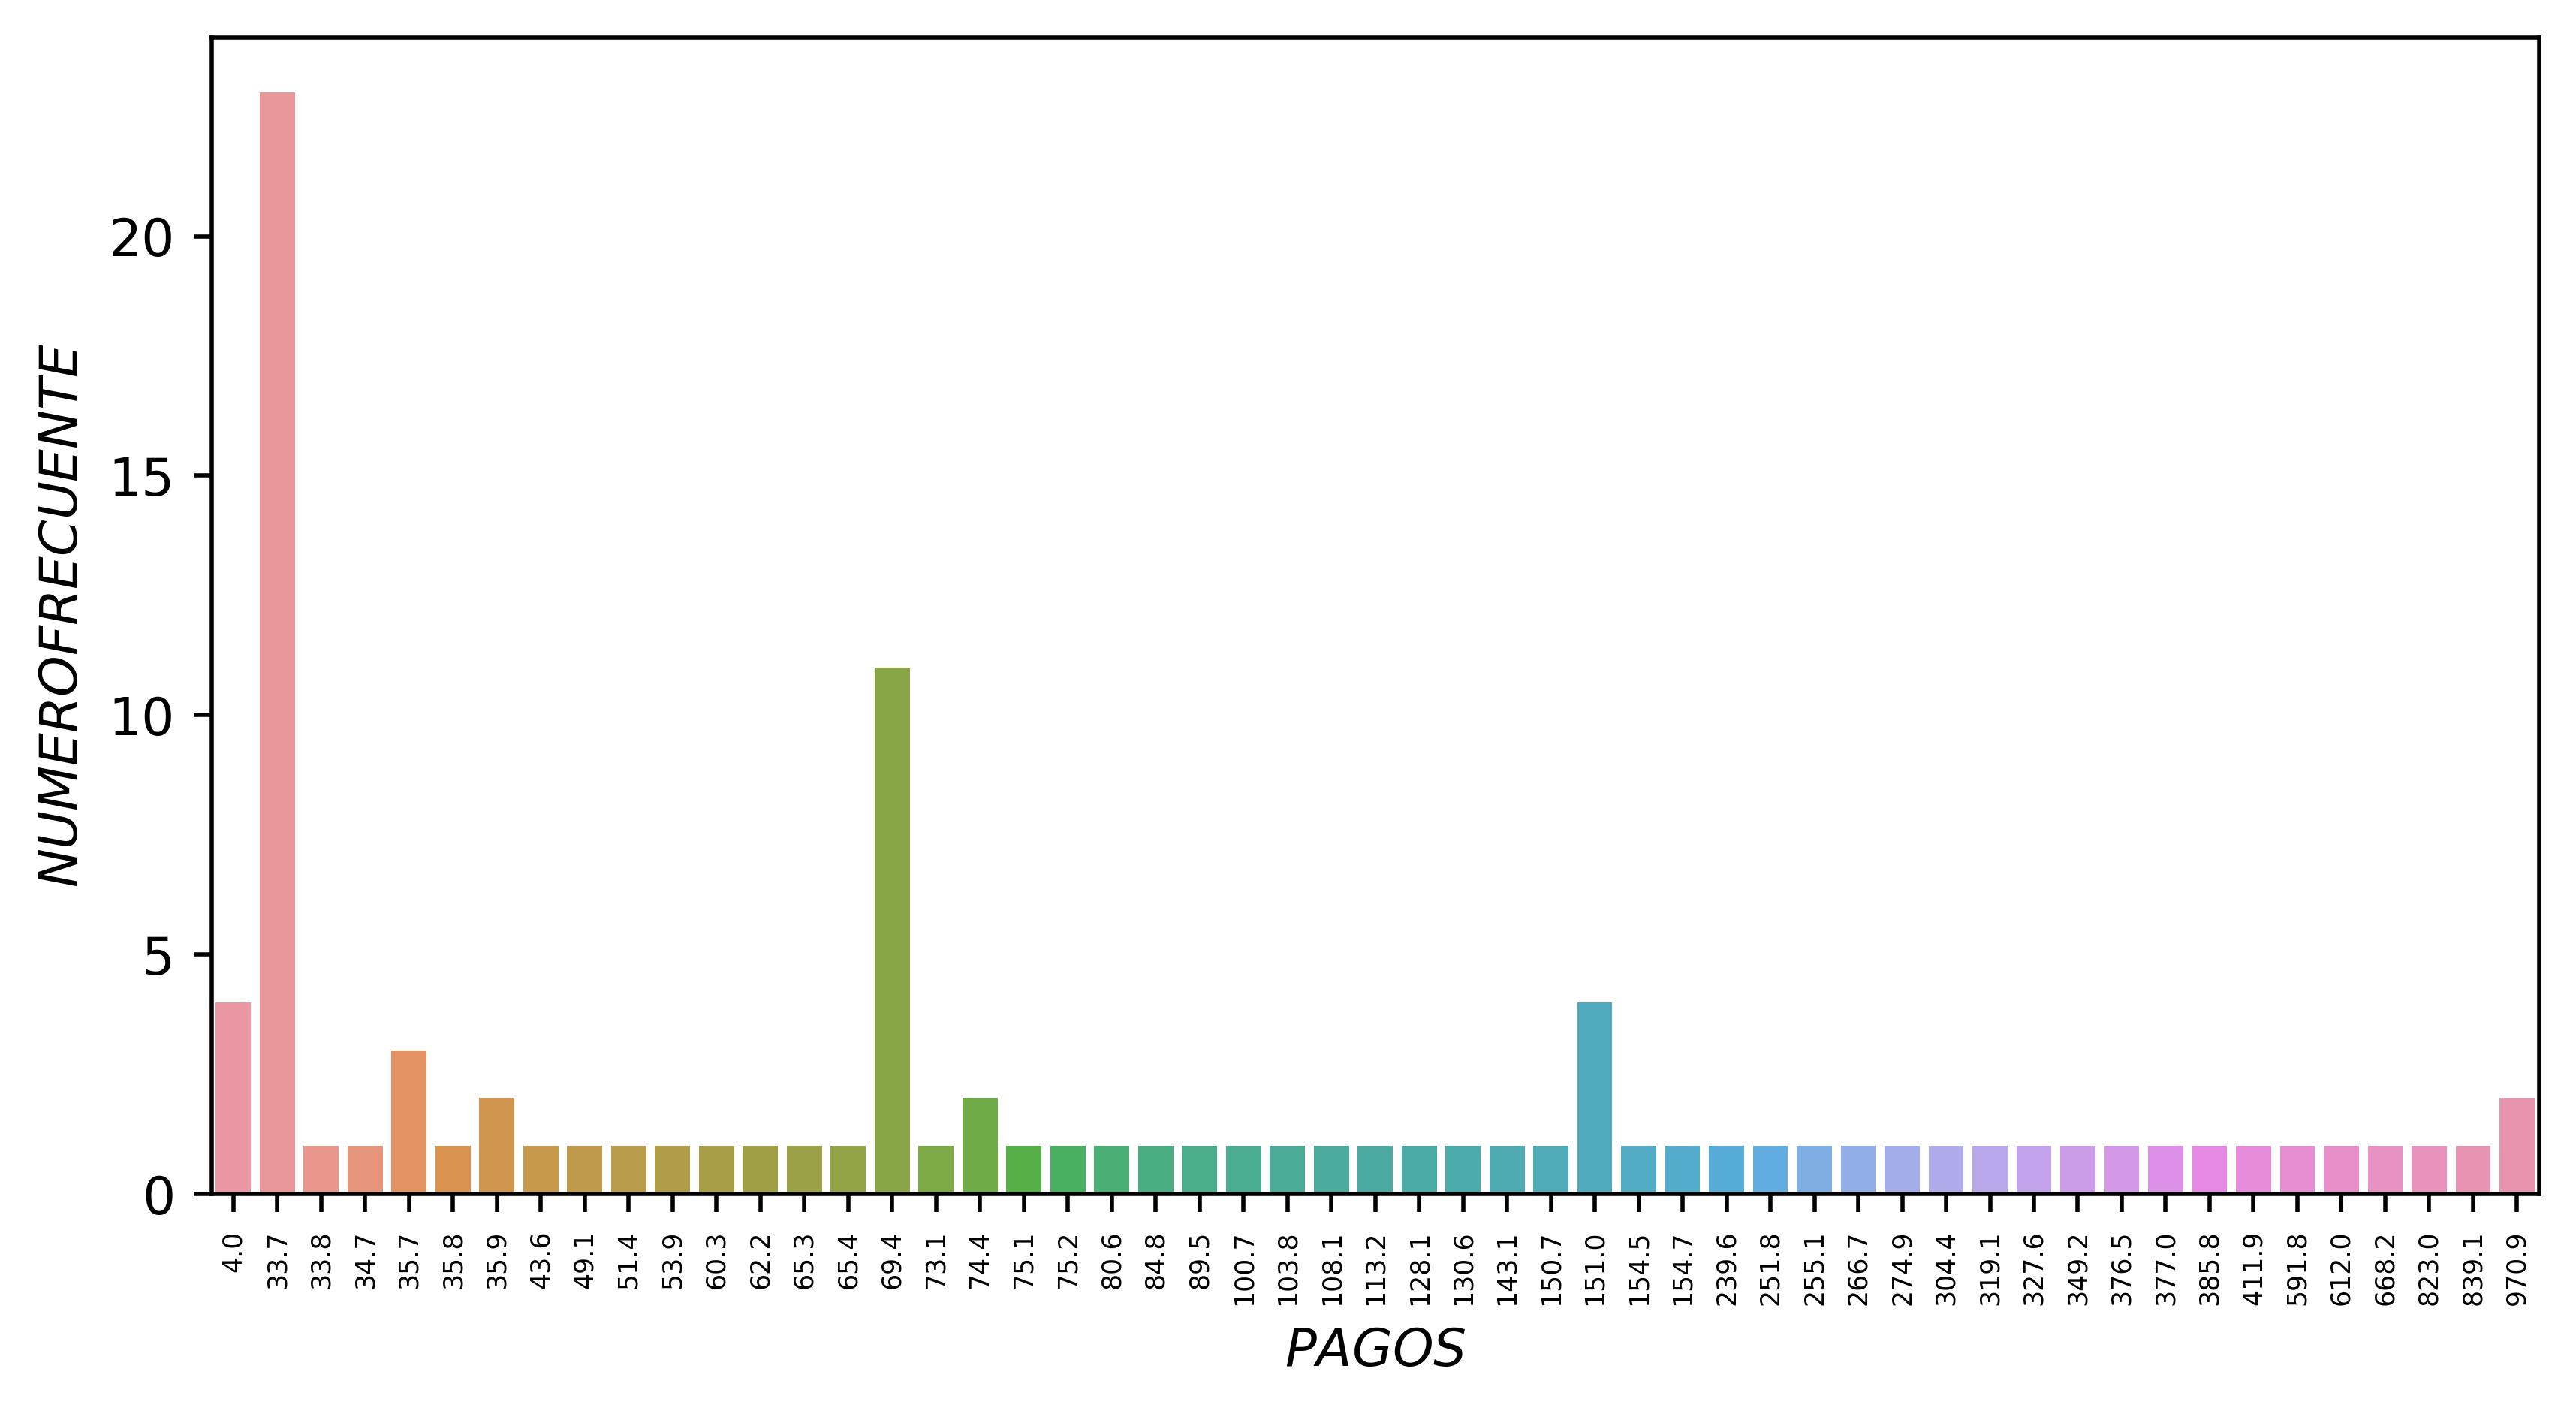

In [32]:
fig = pyplot.figure(figsize=(8,4),dpi=500)
sns.countplot(data=df, x = 'PAGO')
pyplot.xticks(rotation=90,fontsize=5);
pyplot.xlabel('$PAGOS$')
pyplot.ylabel('$NUMERO FRECUENTE$')
pyplot.show()

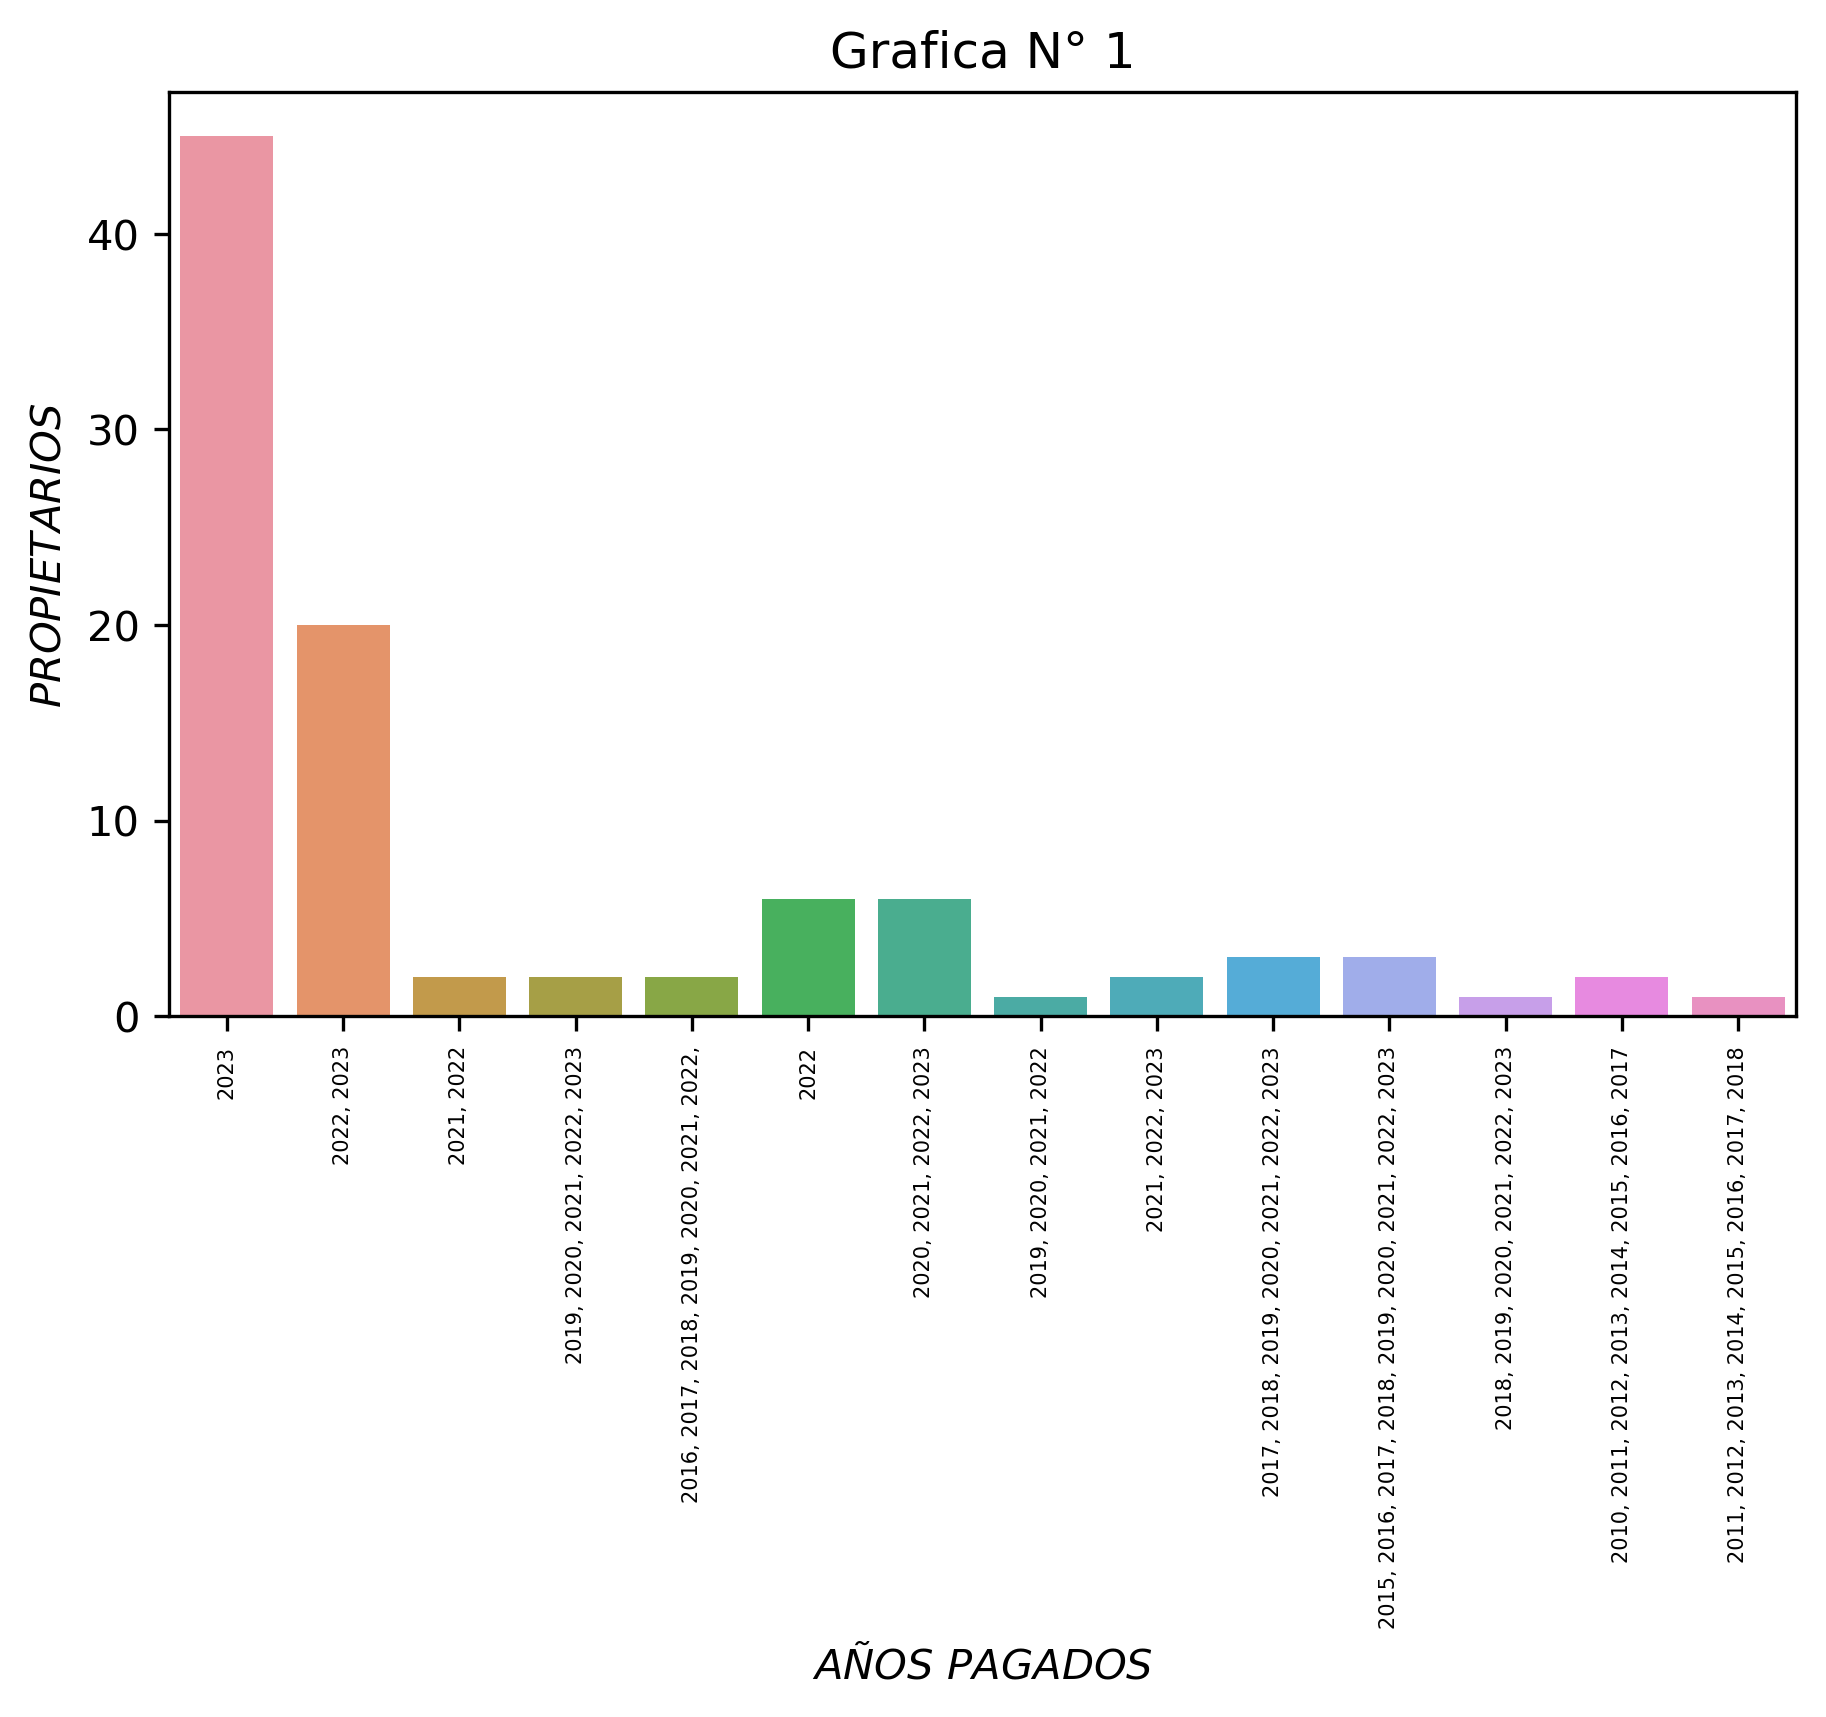

In [39]:
#Inclinacion de las personas por cuantos años pagan
fig = pyplot.figure(figsize=(7,4),dpi=300)
sns.countplot(data=df, x = 'ANIOS_PAGADOS')
pyplot.xticks(rotation=90,fontsize=5);
pyplot.xlabel('$AÑOS\ PAGADOS$')
pyplot.ylabel('$PROPIETARIOS$')
pyplot.title('Grafica N° 1')
pyplot.show()

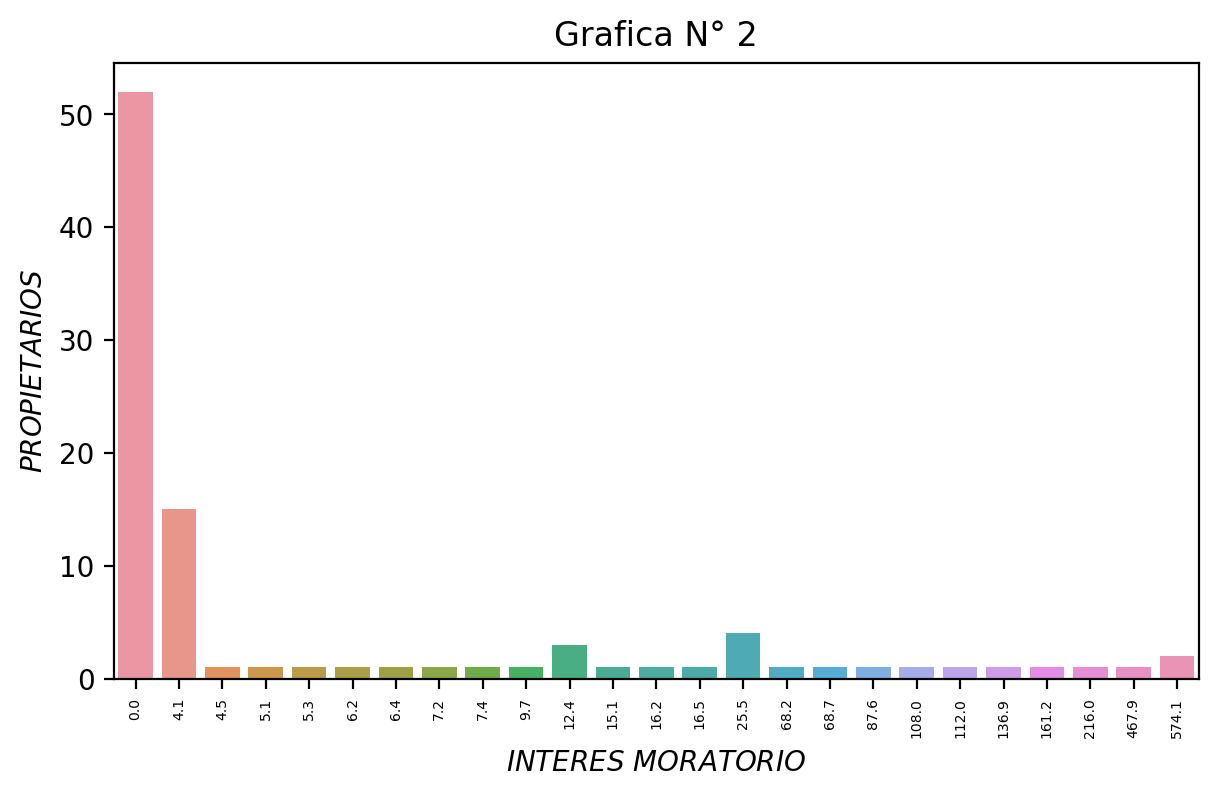

In [38]:
#Personas que pagan puntual y con deudas
fig = pyplot.figure(figsize=(7,4),dpi=200)
sns.countplot(data=df, x = 'INTERES_MORATORIO')
pyplot.xticks(rotation=90,fontsize=5);
pyplot.xlabel('$INTERES\ MORATORIO$')
pyplot.ylabel('$PROPIETARIOS$')
pyplot.title('Grafica N° 2')
pyplot.show()

In [40]:
hola = df[df['SALDO'] == 0]['UUID'].value_counts().reset_index()
hola.columns = ['UUID', 'PAGADO']
hola

,UUID,PAGADO
0,2d79935f-9207-4102-b760-1aa05de1a790,2
1,13437452-38b5-416c-a419-b1e971499b1e,1
2,ea88b502-baa5-4fa6-997e-d65e54d8df1c,1
3,1ff007fa-8f35-45d2-9b35-08f046bed219,1
4,01c4906d-f9f1-4257-b259-139d6ddd2894,1
...,...,...
90,43352e0f-3765-4549-949a-109fa7b0a91d,1
91,50dd44cc-a115-46a3-a3c0-c688d2d399d7,1
92,4531d310-4a38-4208-a22e-e982ece10841,1
93,0f27075a-7f86-43c5-b242-40e37325e735,1


In [41]:
anio = df[df['ANIOS_PAGADOS'] == '2023']['UUID'].value_counts().reset_index()
anio.columns = ['UUID', 'PAGADO']
anio

,UUID,PAGADO
0,13437452-38b5-416c-a419-b1e971499b1e,1
1,4b5435cd-dcde-4aae-ba32-f6a5055b08a1,1
2,ad1d32d0-fe4f-4149-80a0-832c8a3af32a,1
3,1299a6cd-6ce6-4acb-89eb-47eb6edf9b21,1
4,0b0f96b0-d1d0-40fe-b9bf-ae776673365f,1
5,6dbb57c7-9bc1-4d9c-a921-5f8e558c2b66,1
6,01c4906d-f9f1-4257-b259-139d6ddd2894,1
7,6282ab18-7e48-4991-a137-cad4831bb4e3,1
8,c988b5f1-2353-4b56-8714-b9adfa8d8aaf,1
9,384a8f10-0756-4a74-9603-e957d843e6af,1
